In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import h5py

import torch
from segment_anything import sam_model_registry
from segment_anything.utils.transforms import ResizeLongestSide
from SAM_TransferLearning_Methods import preprocess_data, forward

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE  = torch.float32

In [2]:
# Load Valid data
with h5py.File('/Volumes/ES-HDD-Documents/Documents/CFHT_galaxies_with_streams/val_data.h5', 'r') as f:
    images = f['images'][...] # (N, 1, H, W)
    masks  = f['masks'][...]  # (N, 1, H, W)
images = np.transpose((images*255).astype(np.uint8), (0, 2, 3, 1)) # From NCHW to NHWC


In [3]:
# Load boxes and masks in Dictionary for Training Set
bbox_coords = {}
ground_truth_masks = {}
for i in range(images.shape[0]):
    ground_truth_masks[i] = masks[i].astype(bool)
    bbox_coords[i] = np.array([0,0,images.shape[-2],images.shape[-1]])

In [31]:
# sam_checkpoint = '/Users/davidchemaly/Weights/SAM/sam_vit_h_4b8939_fine_tuned.pth'
sam_checkpoint = '/Users/davidchemaly/Weights/SAM/sam_vit_h_4b8939.pth'

model_type = "vit_h"

sam_model = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam_model.to(device=DEVICE);

In [32]:
transform = ResizeLongestSide(sam_model.image_encoder.img_size)

keys = list(bbox_coords.keys())
transformed_data = preprocess_data(sam_model.eval(), images, keys)

In [33]:
k = 11
binary_mask, gt_binary_mask = forward(sam_model.eval(), transformed_data, ground_truth_masks, bbox_coords, k, transform)

In [34]:
(binary_mask != 0).sum()

tensor(276337)

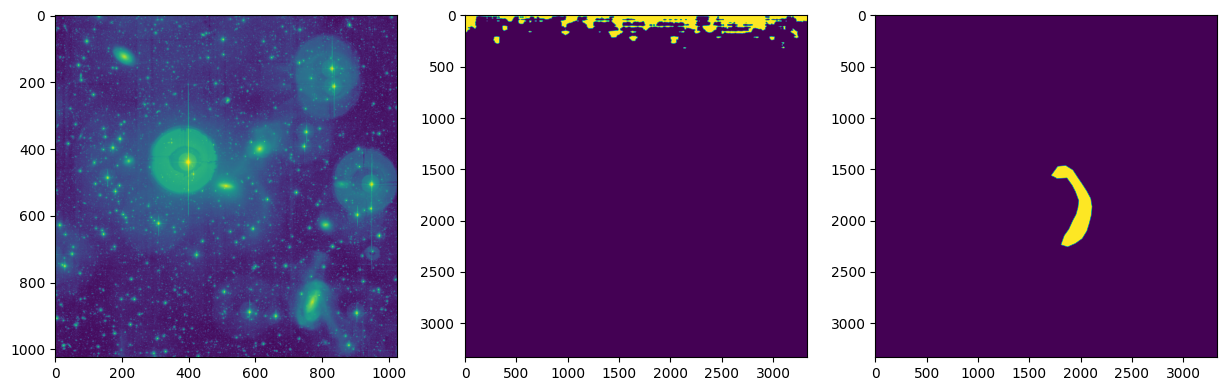

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(transformed_data[k]['image'][0,0].detach().numpy())
plt.subplot(1,3,2)
plt.imshow(binary_mask.detach().numpy()[0,0,:,:])
plt.subplot(1,3,3)
plt.imshow(gt_binary_mask.detach().numpy()[0,0,:,:])

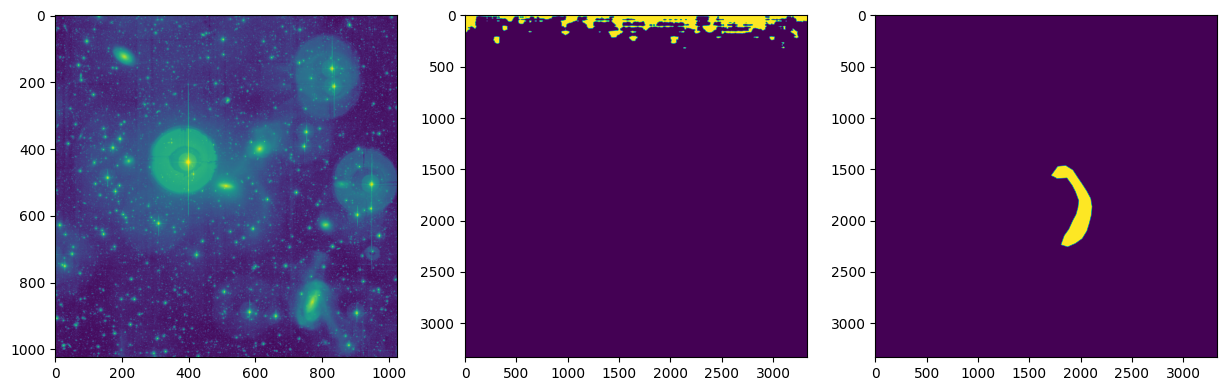

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(transformed_data[k]['image'][0,0].detach().numpy())
plt.subplot(1,3,2)
plt.imshow(binary_mask.detach().numpy()[0,0,:,:])
plt.subplot(1,3,3)
plt.imshow(gt_binary_mask.detach().numpy()[0,0,:,:])